In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification/test.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip


**Importing Train and Test Data**

In [2]:
train = pd.read_csv("/kaggle/input/leaf-classification/train.csv.zip")
test = pd.read_csv("/kaggle/input/leaf-classification/test.csv.zip")

**Converting the Train and Test datasets into dataframe**

**We require the dataframe from pandas**

In [3]:
from pandas import DataFrame

In [4]:
#converting
train_df = pd.read_csv("/kaggle/input/leaf-classification/train.csv.zip")
test_df= pd.read_csv("/kaggle/input/leaf-classification/test.csv.zip")

**Now we need to check for columns present in both datasets**

**And even find the missing values in each column**

In [5]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


**Prining the first five rows of both datasets**

In [6]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [7]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


**10 CLASSIFIERS SHOWDOWN**

**Plotting Libraries**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

**Libraries for splitting**

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

**Preprocessing the data**

In [10]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           
    classes = list(le.classes_)                    
    test_ids = test.id                             
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


**Split of data**

In [11]:
s = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
s.get_n_splits(train, labels)

for train_index, test_index in s.split(train, labels):   
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

**Sklearn Classifier Showdown**

**Simply looping through 10 out-of-the box classifiers and printing the results.**

In [12]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 87.8788%
Log Loss: 2.2502083078831476
SVC
****Results****
Accuracy: 84.3434%
Log Loss: 4.771027550469246
NuSVC
****Results****
Accuracy: 90.4040%
Log Loss: 2.4200723801487474
DecisionTreeClassifier
****Results****
Accuracy: 69.6970%
Log Loss: 10.466295877245761
RandomForestClassifier
****Results****
Accuracy: 98.4848%
Log Loss: 0.7589851289565154
AdaBoostClassifier
****Results****
Accuracy: 3.0303%
Log Loss: 4.290979467326837
GradientBoostingClassifier
****Results****
Accuracy: 65.6566%
Log Loss: 2.9734972836220432
GaussianNB
****Results****
Accuracy: 55.0505%
Log Loss: 15.506623400535767
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.4747%
Log Loss: 0.5108204944709152
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 1.0101%
Log Loss: 34.189899865669254


**Plotting the values**

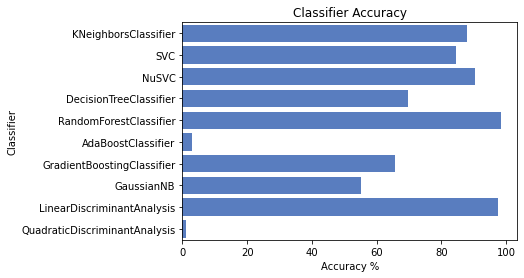

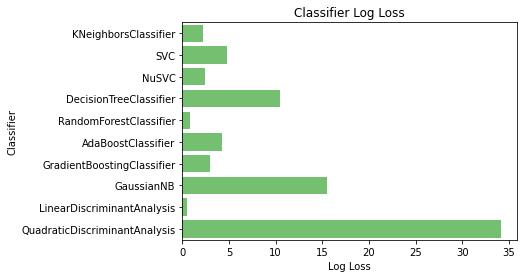

In [13]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

**From above results parameter tuning is required for some classifiers**

In [14]:
train_df['species'].nunique()

99

**99 uniques species**

In [15]:
train_df['species'].value_counts()

Crataegus_Monogyna              10
Quercus_Variabilis              10
Callicarpa_Bodinieri            10
Alnus_Sieboldiana               10
Quercus_Afares                  10
                                ..
Cornus_Chinensis                10
Acer_Mono                       10
Quercus_Alnifolia               10
Viburnum_x_Rhytidophylloides    10
Acer_Capillipes                 10
Name: species, Length: 99, dtype: int64

**Each species has 10 samples in training set**

**Target: classify 594 test samples into 99 species**

**Model selection, model training & fine tuning**

**Three classifiers are considered in this notebook: Random forest classifier, Support vector machine classifier and** **KNeighbors classifier.**

**GridSearchCV is used to fine-tune some hyperparameters**

In [16]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV

In [17]:
cv_sets = ShuffleSplit(n_splits=10,test_size=0.20,random_state=42)
classifiers = [RandomForestClassifier(), SVC(), KNeighborsClassifier()]
params = [{'n_estimators' : [3,10,30], 'max_features':[2,4,6,8]},
          {'kernel':('linear','poly','sigmoid','rbf'),'C':[0.01,0.05,0.025,0.07,0.09,1.0], 'gamma':['scale'], 'probability':[True]},
          {'n_neighbors': [3,5,7,9]}]

In [18]:
best_estimators = []
for classifier, param in zip(classifiers, params):
    grid = GridSearchCV(classifier,param,cv=cv_sets)
    grid = grid.fit(X_train,y_train)
    best_estimators.append(grid.best_estimator_)

In [19]:
best_estimators

[RandomForestClassifier(max_features=8, n_estimators=30),
 SVC(probability=True),
 KNeighborsClassifier(n_neighbors=3)]

In [20]:
for estimator in best_estimators:
    estimator.fit(X_train, y_train)
    name = estimator.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    print('**Training set**')
    train_predictions = estimator.predict(X_train)
    acc = accuracy_score(y_train, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = estimator.predict_proba(X_train)
    ll = log_loss(y_train, train_predictions)
    print("Log Loss: {}".format(ll))
    
    print('**Validation set**')
    train_predictions = estimator.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = estimator.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
print("="*30)

RandomForestClassifier
****Results****
**Training set**
Accuracy: 100.0000%
Log Loss: 0.23322079317500805
**Validation set**
Accuracy: 92.4242%
Log Loss: 0.7892055481585796
SVC
****Results****
**Training set**
Accuracy: 98.7374%
Log Loss: 2.111373324902446
**Validation set**
Accuracy: 89.8990%
Log Loss: 2.3745802370657234
KNeighborsClassifier
****Results****
**Training set**
Accuracy: 94.3182%
Log Loss: 0.15234157438733176
**Validation set**
Accuracy: 87.8788%
Log Loss: 2.2502083078831476
